# How can we get a negative R-squared?

When we meet the underlying assumptions of Linear Regression the R-squared measure should be between 0 and 1. For the R-squared to be negative the variance of our residuals has to be greater than the variance of our outcome, y. This means we built a model that is worse than predicting the mean.

Wikipedia gives an acknowledgement that this is possible. https://en.wikipedia.org/wiki/Coefficient_of_determination

In Sci-kit Learn we calculate $R^2$ as 
$$1 - \frac{SS_{res}}{SS_{tot}}$$

If $SS_{res}$, which corresponds to the variance of our predictions, is larger than $SS_{tot}$, which corresponds to the variance of our outcome, we can easily see that the $R^2$ will be negative.

**When might this happen?**
- When we run a model without a intercept/constant we are not guaranteed to do better than the mean
- When we test the model on out of sample data
  - If the variance of the data is larger than our initial sample, than something is wrong with out testing procedure
  - If the variance of the residuals is higher, then our model does not generalize well.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 
# Larger plots by default
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
# Read in the mammal dataset, and drop missing data.
mammals = pd.read_csv('assets/dataset/msleep/msleep.csv')

In [3]:
#Subset mammals to exclude missing rows and make a new copy of the DataFrame
mammals = mammals.dropna()
# Look at the counterpart of isnull() we can just get .notnull() 

In [4]:
X = mammals[['bodywt']].apply(np.log10)
y = mammals['brainwt'].apply(np.log10)

In [5]:
from sklearn import linear_model
lmc = linear_model.LinearRegression(fit_intercept=True) # With constant
lm = linear_model.LinearRegression(fit_intercept=False) # Without constant
# Fit models
lmc.fit(X, y)
lm.fit(X, y)
# Extract predictions
lmc_pred = lmc.predict(X)
lm_pred = lm.predict(X)
# Extract residuals
lmc_residuals = y-lmc.predict(X)
lm_residuals = y-lm.predict(X)

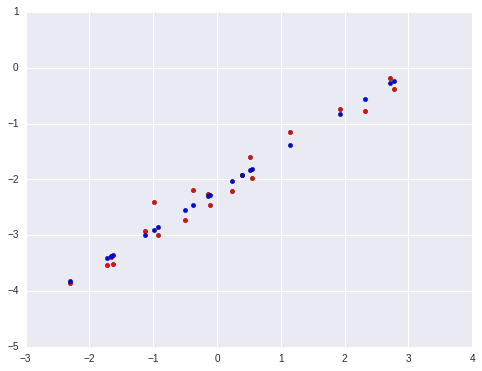

In [6]:
# Visualize predictions (in blue) from linear model with constant
plt.figure()
plt.scatter(X.bodywt, y, c='red')
plt.scatter(X.bodywt, lmc_pred)

In [7]:
# The constant ensures that our residuals center around zero
lmc_residuals.mean() # -0.0000000000000003 close enough

-3.885780586188048e-16

(array([ 7.,  2.,  3.,  2.,  2.,  0.,  3.,  0.,  0.,  1.]),
 array([-0.21075684, -0.13944945, -0.06814206,  0.00316533,  0.07447272,
         0.14578011,  0.2170875 ,  0.28839489,  0.35970228,  0.43100967,
         0.50231706]),
 <a list of 10 Patch objects>)

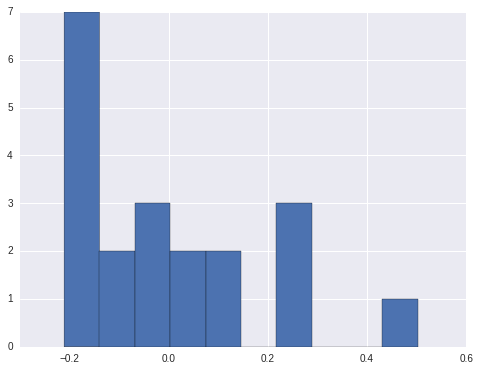

In [8]:
# Here is the distribution of the residuals
plt.figure()
plt.hist(lmc_residuals)
# A little skewed, but correctly centered

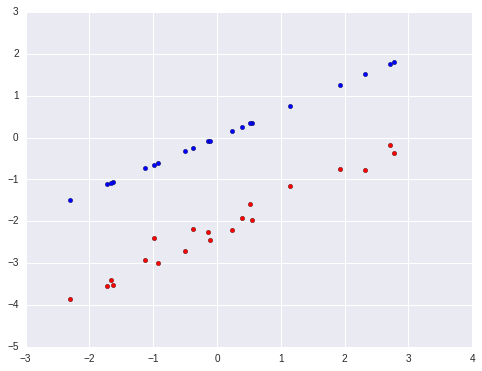

In [9]:
# Visualize predictions from linear model without constant
plt.figure()
plt.scatter(X.bodywt, y, c='red')
plt.scatter(X.bodywt, lm_pred)
# You can clearly see this model has issues since we forced it to go through the point (0, 0)

# This is a pretty rare case where the best line of fit is parallel to the data ... 
# If our data clustered around the zero mark our line of best fit would be more vertical

In [10]:
# We constantly overshoot our estimation of the brainwt so, our residuals tend to be negative
lm_residuals.mean()

-2.1941996282635188

(array([ 4.,  5.,  1.,  3.,  1.,  0.,  1.,  4.,  0.,  1.]),
 array([-2.45737517, -2.38667446, -2.31597374, -2.24527303, -2.17457232,
        -2.1038716 , -2.03317089, -1.96247018, -1.89176946, -1.82106875,
        -1.75036804]),
 <a list of 10 Patch objects>)

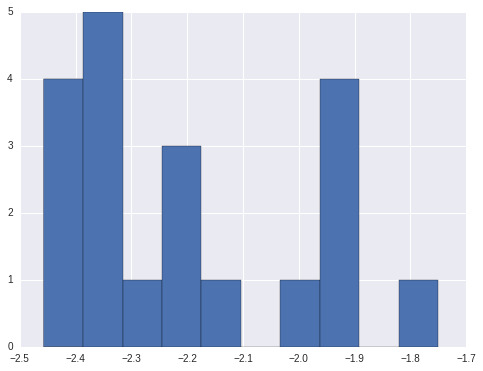

In [11]:
# Here is the distribution of the residuals
plt.figure()
plt.hist(lm_residuals)

Let's plot our residuals against our outcome values. This is a common way of diagnosing issues in models and looking for patterns that we may have missed.

On the y-axis we show our residuals, note that they SHOULD center around 0.
On the x-axis we have our outcome values.

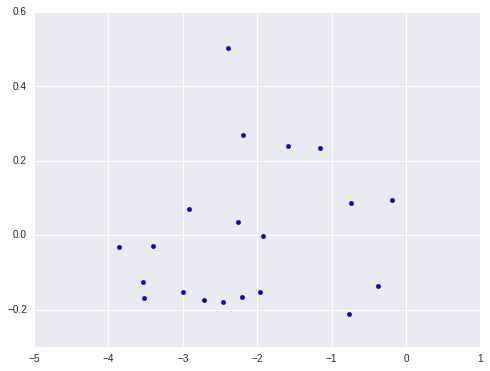

In [12]:
plt.figure()
plt.scatter(y, lmc_residuals)
# This plot looks relatively good, we don't see any clear association left and our residuals seem to scatter around 0

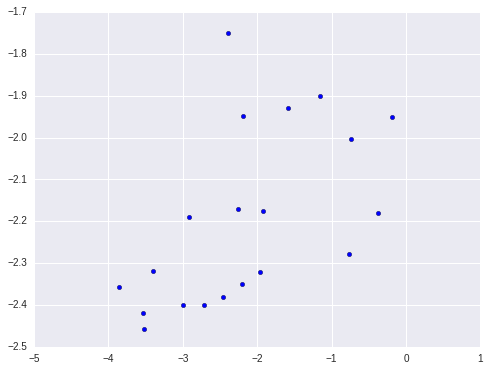

In [13]:
plt.figure()
plt.scatter(y, lm_residuals)
# The version without a constant has a clear problem, we consistently underestimate the brainwt! 
# No wonder we do worse than the mean
# There a bit of an upward linear trend left as well if you look closely